In [ ]:
# get_chemical_structure.ipynb

import requests
from collections import defaultdict
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D, DrawingOptions
import base64
import io

def get_chemical_structure(query):
    path = f"https://lotus.naturalproducts.net/api/search/simple?query={query}"
    response = requests.get(path).json()
    compounds = []

    for i in response['naturalProducts']:
        lotus_id = str(i['lotus_id'])
        smiles = i['smiles']
        group = i.get('chemicalTaxonomyNPclassifierSuperclass', 'Unknown')
        path_lotus = f'https://lotus.naturalproducts.net/compound/lotus_id/{lotus_id}'
        caption = f'<a href="{path_lotus}" target="_blank" rel="noopener noreferrer">{lotus_id}</a>'

        mol = Chem.MolFromSmiles(smiles)
        mol.SetProp('_Name', lotus_id)
        DrawingOptions.atomLabelFontSize = 1.0
        DrawingOptions.dotsPerAngstrom = 100
        DrawingOptions.bondLineWidth = 2

        drawer = rdMolDraw2D.MolDraw2DCairo(200, 200)
        drawer.drawOptions().useBWAtomPalette()
        drawer.DrawMolecule(mol)
        drawer.FinishDrawing()

        bio = io.BytesIO()
        bio.write(drawer.GetDrawingText())
        bio.seek(0)
        b64_encoded_png = base64.b64encode(bio.read()).decode('utf-8')

        compounds.append({
            'lotus_id': lotus_id,
            'smiles': smiles,
            'img_data': b64_encoded_png,
            'caption': caption,
            'group': group
        })
    return compounds

occ = get_chemical_structure('Angelica sinensis')
occ


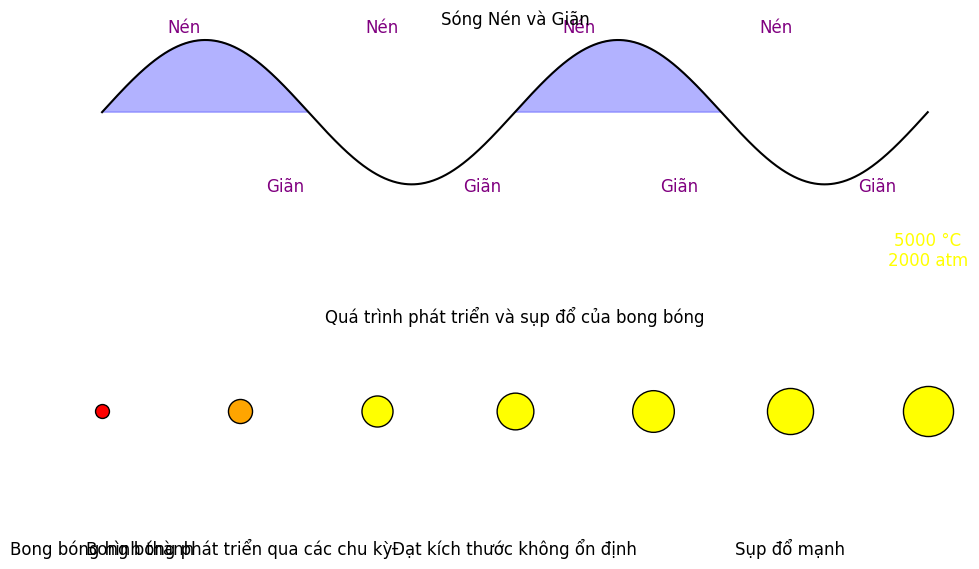

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo sóng nén và giãn
x = np.linspace(0, 4 * np.pi, 1000)
y = np.sin(x)

# Kích thước bong bóng ở từng giai đoạn
bubble_sizes = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3]
bubble_colors = ['red', 'orange', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow']

# Vẽ sóng nén và giãn
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(x, y, color='black')
plt.fill_between(x, y, where=(y > 0), color='blue', alpha=0.3)
plt.fill_between(x, y, where=(y < 0), color='white', alpha=0.3)
plt.text(1, 1.1, 'Nén', color='purple', fontsize=12)
plt.text(4, 1.1, 'Nén', color='purple', fontsize=12)
plt.text(7, 1.1, 'Nén', color='purple', fontsize=12)
plt.text(10, 1.1, 'Nén', color='purple', fontsize=12)
plt.text(2.5, -1.1, 'Giãn', color='purple', fontsize=12)
plt.text(5.5, -1.1, 'Giãn', color='purple', fontsize=12)
plt.text(8.5, -1.1, 'Giãn', color='purple', fontsize=12)
plt.text(11.5, -1.1, 'Giãn', color='purple', fontsize=12)
plt.title('Sóng Nén và Giãn')
plt.axis('off')

# Vẽ quá trình phát triển bong bóng
plt.subplot(2, 1, 2)
for i, size in enumerate(bubble_sizes):
    plt.scatter(i, 0, s=size*1000, color=bubble_colors[i], edgecolor='black')
plt.text(0, -0.1, 'Bong bóng hình thành', fontsize=12, ha='center')
plt.text(1, -0.1, 'Bong bóng phát triển qua các chu kỳ', fontsize=12, ha='center')
plt.text(3, -0.1, 'Đạt kích thước không ổn định', fontsize=12, ha='center')
plt.text(5, -0.1, 'Sụp đổ mạnh', fontsize=12, ha='center')
plt.text(6, 0.1, '5000 °C\n2000 atm', fontsize=12, ha='center', color='yellow')
plt.title('Quá trình phát triển và sụp đổ của bong bóng')
plt.axis('off')

plt.tight_layout()
plt.show()

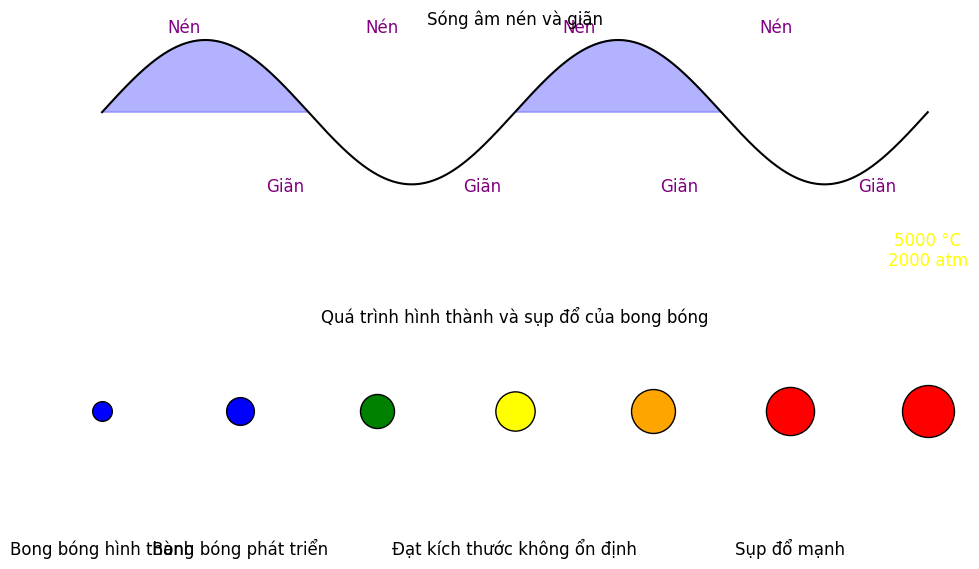

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo dữ liệu cho sóng âm
x = np.linspace(0, 4 * np.pi, 1000)
y = np.sin(x)

# Kích thước bong bóng tương ứng
bubble_sizes = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
bubble_colors = ['blue', 'blue', 'green', 'yellow', 'orange', 'red', 'red']

# Vẽ sóng âm
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(x, y, color='black')
plt.fill_between(x, y, where=(y > 0), color='blue', alpha=0.3)
plt.fill_between(x, y, where=(y < 0), color='white', alpha=0.3)
plt.text(1, 1.1, 'Nén', color='purple', fontsize=12)
plt.text(4, 1.1, 'Nén', color='purple', fontsize=12)
plt.text(7, 1.1, 'Nén', color='purple', fontsize=12)
plt.text(10, 1.1, 'Nén', color='purple', fontsize=12)
plt.text(2.5, -1.1, 'Giãn', color='purple', fontsize=12)
plt.text(5.5, -1.1, 'Giãn', color='purple', fontsize=12)
plt.text(8.5, -1.1, 'Giãn', color='purple', fontsize=12)
plt.text(11.5, -1.1, 'Giãn', color='purple', fontsize=12)
plt.title('Sóng âm nén và giãn')
plt.axis('off')

# Vẽ sự phát triển và sụp đổ của bong bóng
plt.subplot(2, 1, 2)
for i, size in enumerate(bubble_sizes):
    plt.scatter(i, 0, s=size*1000, color=bubble_colors[i], edgecolor='black')
plt.text(0, -0.1, 'Bong bóng hình thành', fontsize=12, ha='center')
plt.text(1, -0.1, 'Bong bóng phát triển', fontsize=12, ha='center')
plt.text(3, -0.1, 'Đạt kích thước không ổn định', fontsize=12, ha='center')
plt.text(5, -0.1, 'Sụp đổ mạnh', fontsize=12, ha='center')
plt.text(6, 0.1, '5000 °C\n2000 atm', fontsize=12, ha='center', color='yellow')
plt.title('Quá trình hình thành và sụp đổ của bong bóng')
plt.axis('off')

plt.tight_layout()
plt.show()

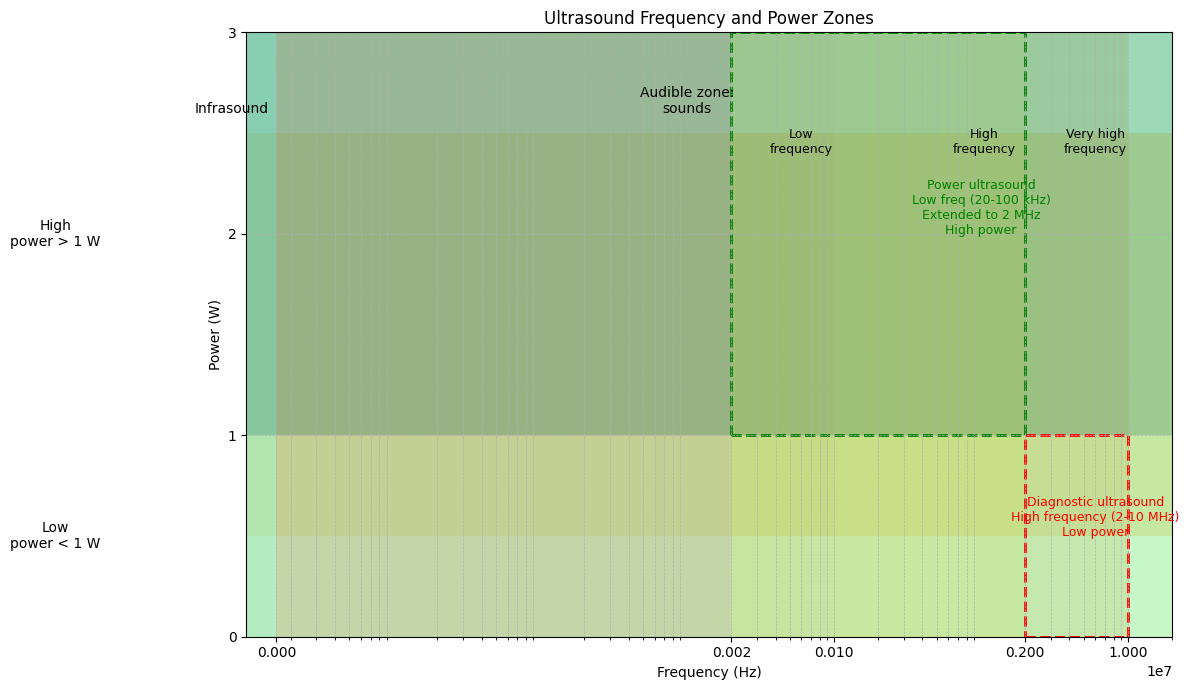

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Tạo hình ảnh
fig, ax = plt.subplots(figsize=(12, 7))

# Tô vùng siêu âm (Ultrasound)
ax.axhspan(0.5, 2.5, xmin=20/10000000, xmax=10000000/10000000, facecolor='orange', alpha=0.3, label='Ultrasound')

# Vẽ các vùng tần số
ax.axvspan(0, 16, facecolor='lightblue', alpha=0.5)
ax.text(8, 2.6, 'Infrasound', ha='center', fontsize=10)

ax.axvspan(16, 20000, facecolor='lightcoral', alpha=0.5)
ax.text(10000, 2.6, 'Audible zone:\nsounds', ha='center', fontsize=10)

# Vẽ các vùng tần số siêu âm
ax.axvspan(20000, 100000, facecolor='darkorange', alpha=0.3)
ax.text(60000, 2.4, 'Low\nfrequency', ha='center', fontsize=9)

ax.axvspan(100000, 2000000, facecolor='orange', alpha=0.3)
ax.text(1050000, 2.4, 'High\nfrequency', ha='center', fontsize=9)

ax.axvspan(2000000, 10000000, facecolor='sandybrown', alpha=0.3)
ax.text(6000000, 2.4, 'Very high\nfrequency', ha='center', fontsize=9)

# Vẽ vùng công suất
ax.axhspan(0, 1, facecolor='lightgreen', alpha=0.5)
ax.text(0.5, 0.5, 'Low\npower < 1 W', va='center', ha='center', fontsize=10)

ax.axhspan(1, 3, facecolor='mediumseagreen', alpha=0.5)
ax.text(0.5, 2, 'High\npower > 1 W', va='center', ha='center', fontsize=10)

# Vùng Diagnostic ultrasound
ax.add_patch(patches.Rectangle((2000000, 0), 8000000, 1, edgecolor='red', facecolor='none', lw=2, linestyle='--'))
ax.text(6000000, 0.5, 'Diagnostic ultrasound\nHigh frequency (2-10 MHz)\nLow power', 
        color='red', fontsize=9, ha='center')

# Vùng Power ultrasound
ax.add_patch(patches.Rectangle((20000, 1), 1980000, 2, edgecolor='green', facecolor='none', lw=2, linestyle='--'))
ax.text(1000000, 2, 'Power ultrasound\nLow freq (20-100 kHz)\nExtended to 2 MHz\nHigh power', 
        color='green', fontsize=9, ha='center')

# Thiết lập trục
ax.set_xscale('log')
ax.set_xlim(10, 20000000)
ax.set_xticks([16, 20000, 100000, 2000000, 10000000])
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.set_xlabel("Frequency (Hz)")

ax.set_ylim(0, 3)
ax.set_yticks([0, 1, 2, 3])
ax.set_ylabel("Power (W)")

# Thêm tiêu đề
ax.set_title("Ultrasound Frequency and Power Zones")

plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
